In [51]:
# Import the necessary libraries and create the environment
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v1', render_mode='ansi')

In [52]:
def train_table(Q_, num_episodes, lr, gamma):
    success_rate = []
    rewards = []
    steps = []
    # Run the Q-learning algorithm
    for episode in range(num_episodes):
        # Reset the environment and get the initial state
        state, _ = env.reset()
        step = 0
        done = False
        truncated = False
        total_reward = 0
        
        # Decaying epsilon-greedy strategy
        epsilon = max(0.01, 1.0 - episode / (0.9 * num_episodes))
        
        while not done and not truncated:
            # Choose an action using epsilon-greedy policy
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q_[state, :])
            
            # Take the action and observe the next state and reward
            next_state, reward, done, truncated, _ = env.step(action)
                    
            # Update the Q_-value for the current state-action pair
            Q_[state, action] = Q_[state, action] + lr * (reward + gamma * np.max(Q_[next_state, :]) - Q_[state, action])
            
            total_reward += reward
            state = next_state
            step += 1
                
        if truncated:
            total_reward -= 10.0
        rewards.append(total_reward)
        steps.append(step)
        
        # Calculate and append the success rate every 5000 episodes
        if (episode + 1) % 5000 == 0:
            success_rate.append(np.mean(rewards[-5000:]))
    
    print(f"Success rate over last 1000 episodes: {success_rate[-1]}")
    return Q_, success_rate

In [53]:
# Test the trained agent
def test_agent(Q_, num_test_episodes, show_render=False):
    total_reward = 0
    success_count = 0
    total_steps = 0
    
    for _ in range(num_test_episodes):
        state, _ = env.reset()
        done = False
        truncated = False
        episode_reward = 0
        episode_steps = 0
        
        while not done and not truncated:
            action = np.argmax(Q_[state, :])
            state, reward, done, truncated, _ = env.step(action)
            if show_render:
                print(env.render())
            episode_reward += reward
            episode_steps += 1
            
        total_reward += episode_reward
        total_steps += episode_steps
        if episode_reward > 0:
            success_count += 1
    
    avg_reward = total_reward / num_test_episodes
    success_rate = success_count / num_test_episodes
    avg_steps = total_steps / num_test_episodes
    
    print(f"Testing Results:")
    print(f"Average Reward: {avg_reward:.2f}")
    print(f"Success Rate: {success_rate:.2f}")
    print(f"Average Steps: {avg_steps:.2f}")


In [54]:
def show_plot(lr, gamma, num_episodes, success_rate):
    plt.plot(1000 * (np.arange(len(success_rate)) + 1), success_rate)
    plt.xlabel('Episode')
    plt.ylabel('Success Rate')
    plt.title('Success Rate vs Episodes')
    plt.figtext(.15, .8, f"LR = {lr}")
    plt.figtext(.15, .75, f"gamma = {gamma}")
    plt.figtext(.15, .7, f"num episodes = {num_episodes:,}")
    plt.show()

In [55]:
def get_empty_q_table():
    return np.zeros([env.observation_space.n, env.action_space.n])

Success rate over last 1000 episodes: 0.2216
Testing Results:
Average Reward: 0.44
Success Rate: 0.44
Average Steps: 29.60


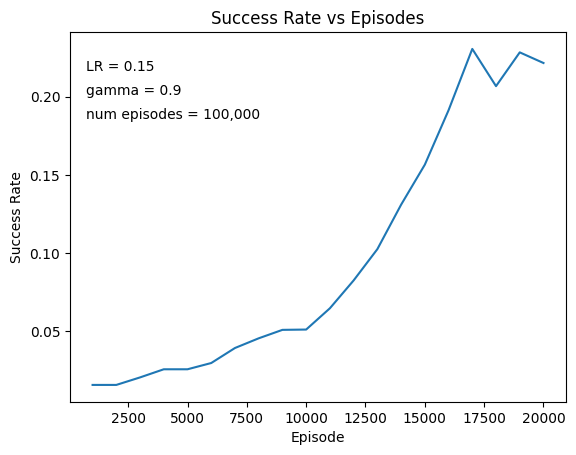

In [56]:
lr = 0.15
gamma = 0.90
num_episodes = 100_000

Q = get_empty_q_table()

Q, success_rate = train_table(Q, num_episodes, lr, gamma)
test_agent(Q, num_test_episodes=1000)
show_plot(lr, gamma, num_episodes, success_rate)

Success rate over last 1000 episodes: 0.0982
Testing Results:
Average Reward: 0.11
Success Rate: 0.11
Average Steps: 9.88


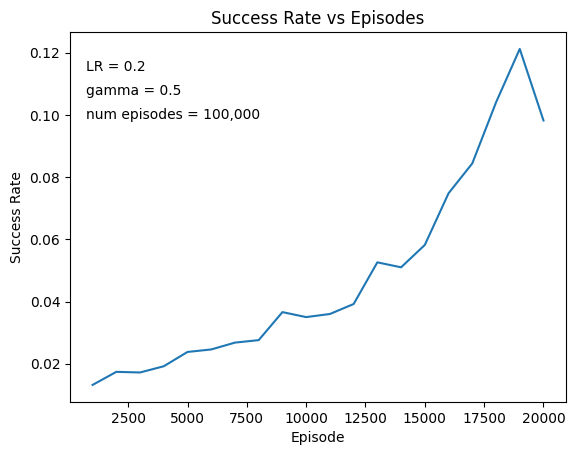

In [57]:
lr = 0.2
gamma = 0.50
num_episodes = 100_000

Q = get_empty_q_table()

Q, success_rate = train_table(Q, num_episodes, lr, gamma)
test_agent(Q, num_test_episodes=1000)
show_plot(lr, gamma, num_episodes, success_rate)

Success rate over last 1000 episodes: 0.1812
Testing Results:
Average Reward: 0.11
Success Rate: 0.11
Average Steps: 26.26


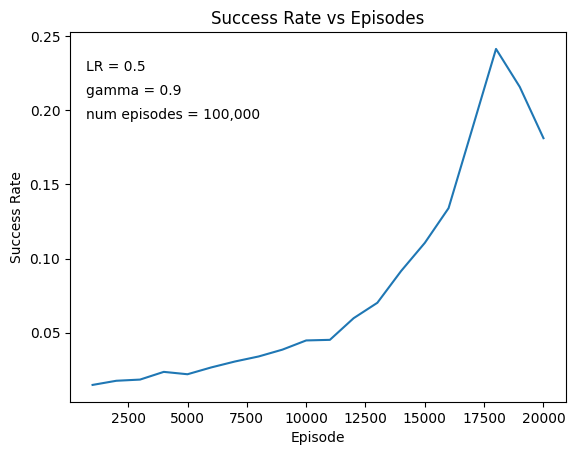

In [59]:
lr = 0.5
gamma = 0.9
num_episodes = 100_000

Q = get_empty_q_table()

Q, success_rate = train_table(Q, num_episodes, lr, gamma)
test_agent(Q, num_test_episodes=1000)
show_plot(lr, gamma, num_episodes, success_rate)

Success rate over last 1000 episodes: -0.006
Testing Results:
Average Reward: 0.00
Success Rate: 0.00
Average Steps: 17.99


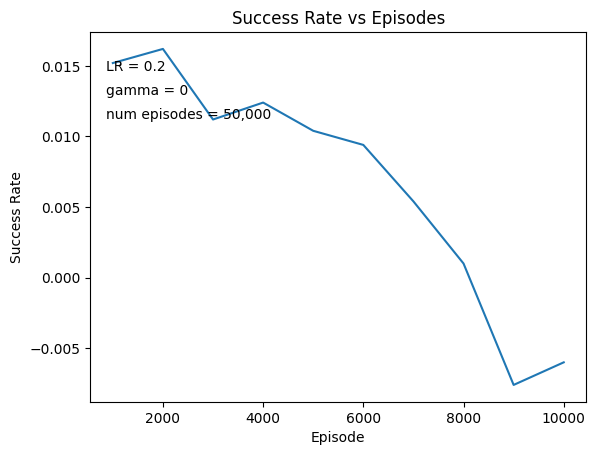

In [62]:
lr = 0.2
gamma = 0
num_episodes = 50_000

Q = get_empty_q_table()

Q, success_rate = train_table(Q, num_episodes, lr, gamma)
test_agent(Q, num_test_episodes=1000)
show_plot(lr, gamma, num_episodes, success_rate)

Success rate over last 1000 episodes: 0.2284
Testing Results:
Average Reward: 0.52
Success Rate: 0.52
Average Steps: 30.09


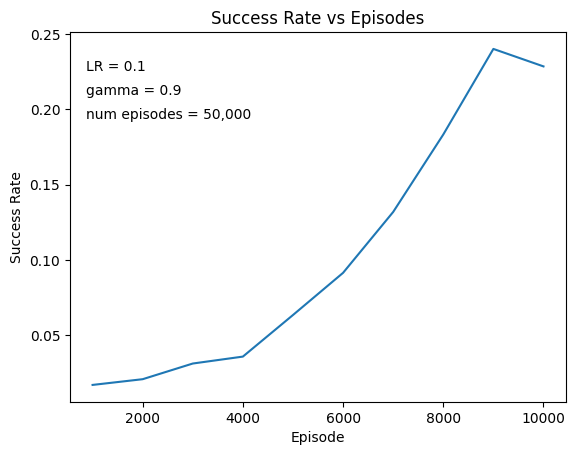

In [63]:
lr = 0.1
gamma = 0.9
num_episodes = 50_000

Q = get_empty_q_table()

Q, success_rate = train_table(Q, num_episodes, lr, gamma)
test_agent(Q, num_test_episodes=1000)
show_plot(lr, gamma, num_episodes, success_rate)